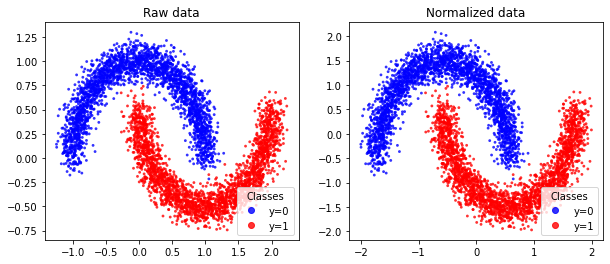

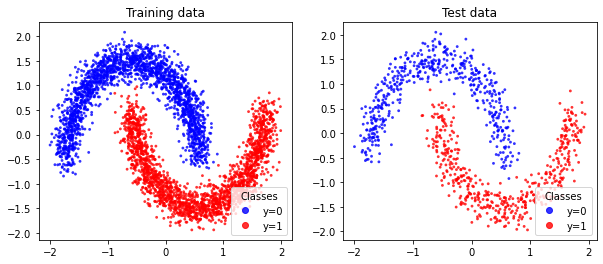

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
X,y = make_moons(noise=0.1, random_state=0,n_samples = 5000)
def scatter_2class(X, y, ylabels =['y=0','y=1'], alpha = 0.8, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap ='bwr',s = 8, alpha = alpha, edgecolors = 'none')
    ax.legend(scatter.legend_elements()[0],ylabels , loc="lower right", title="Classes")



from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize = (10,4))
scatter_2class(X,y, ax = axs[0])
axs[0].set_title('Raw data')
scatter_2class(X_norm, y, ax = axs[1])
axs[1].set_title('Normalized data')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

fig, axs = plt.subplots(1, 2, figsize = (10,4))
scatter_2class(X_train,y_train, ax = axs[0])
axs[0].set_title('Training data')
scatter_2class(X_test, y_test, ax = axs[1])
axs[1].set_title('Test data')
plt.show()


# Consider a neural network with 1 hidden layer 

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*MaTvYkgr-be3UuY_Z_hxMQ.jpeg)
# Feedforward 
## Input layer --> hidden layer 
based on (5.2-5.3) 
$$ 
a_1 = \sum_{i = 1}^D w_{1i}x_i + b_1 \ \\
z_1 = h(a_1)$$
here we choose $h(\cdot)$ is a tanh function, with 
 $$
 \tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}} \ (5.59)\\
   \tanh'(a) = 1-\tanh(a)^2 \ (5.60)
   $$


## Hidden layer -->  output layer 
 (based on (5.4-6) )
$$ a_2 = \sum_{i = 1}^M w_{2i}z_1 + b_2$$
$$ y = \sigma(a_2)$$
where $\sigma(a) =\frac{1}{1+\exp(-a)}$ 
# Backpropagation 
## Cross-entropy error function of the sigmoid function 
$$ E(w) = -\sum_{n = 1}^N \{t_n \ln y_n +(1+t_n) \ln (1-y_n)\}  \ (5.21)$$

## Backpropagation: ouput layer --> hidden layer 
$$
\frac{\partial E_n}{\partial w_{2k}} = \sigma_{2k} z_1 = (z_{2k} -t_k) z_1
 \  \text{based on (5.53-5.54)}
$$


## Backpropagation: hidden layer --> input layer 
$$
\frac{\partial E_n}{\partial w_{1i}} 
=\sigma_{1i} x_i 
= x_ih'(a_i) \sum_k w_{ki}\sigma_{2k} 
 \ \   \text{based on (5.53-5.56)}
$$
where $h'(a) = 1-h(a)^2$ (5.60). 

In [2]:
def sigmoid(a):
    return 1/(1+np.exp(-a))
class NeuralNetwork_simple():
    def __init__(self,size,learning_rate,n_epoch=1000 ):
        self.learning_rate =learning_rate
        self.size = size
        self.n_epoch=n_epoch
    def initial_params(self):
        size_input, size_hidden_layer, size_output = self.size
        Parameters = dict()
        Parameters['W1'] = np.random.randn(size_hidden_layer,size_input) * 0.01
        Parameters['b1']= np.zeros(shape=(size_hidden_layer, 1))
        Parameters['W2'] = np.random.randn(size_output,size_hidden_layer) * 0.01
        Parameters['b2'] = np.zeros(shape=(size_output, 1))
        self.Parameters = Parameters

    def feed_forward(self,X, return_output = False):
        W1 = self.Parameters['W1']
        W2 = self.Parameters['W2']
        b1 = self.Parameters['b1']
        b2 = self.Parameters['b2']

        A1 = np.dot(W1,X) + b1
        Z1 = np.tanh(A1)
        A2 = np.dot(W2,Z1) + b2
        Z2 = sigmoid(A2) # Final output prediction
        cache=dict()
        cache['Z1'] = Z1
        cache['A1'] = A1
        cache['Z2'] = Z2
        cache['A2'] = A2
        self.cache = cache
        if return_output: 
            return Z2

        
    def error_function(self, y):
        Z2 = self.cache['Z2']
        n_samples = y.shape[0]
        logprobs = np.multiply(np.log(Z2), y) + np.multiply((1 - y), np.log(1 - Z2))
        error = - np.sum(logprobs) / n_samples
        return error



    def backpropagation(self, X,y):
        m = y.shape[1]
        W1 = self.Parameters['W1']
        W2 = self.Parameters['W2']
        b1 = self.Parameters['b1']
        b2 = self.Parameters['b2']

        A1 = self.cache['A1']
        A2 = self.cache['A2']
        Z1 = self.cache['Z1']
        Z2 = self.cache['Z2']
    

        dZ2 = Z2 - y
        dW2 = (1 / m) * np.dot(dZ2, Z1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(Z1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
        grads = dict()
        grads['dW1'] = dW1 
        grads['dW2'] = dW2
        grads['db1'] = db1 
        grads['db2'] = db2
        self.grads = grads
     

    def update_parameters(self):

        dW1 = self.grads['dW1']
        dW2 = self.grads['dW2']
        db1 = self.grads['db1']
        db2 = self.grads['db2']
        W1 = self.Parameters['W1']
        W2 = self.Parameters['W2']
        b1 = self.Parameters['b1']
        b2 = self.Parameters['b2']
        W1 = W1 - self.learning_rate * dW1
        b1 = b1 - self.learning_rate * db1
        W2 = W2 - self.learning_rate * dW2
        b2 = b2 - self.learning_rate * db2

        self.Parameters['W1'] = W1
        self.Parameters['W2'] = W2
        self.Parameters['b1'] = b1
        self.Parameters['b2'] = b2 
    def fit(self, X, y):
        if len(y.shape) == 1:
            y = np.expand_dims(y,axis = 0)
        self.initial_params()
        
        self.error_epoch = np.zeros(self.n_epoch)
        for i in range(self.n_epoch):
            self.feed_forward(X)
            self.backpropagation(X,y)
            self.update_parameters()
            self.error_epoch[i]=self.error_function(y)
    def predict(self, X_test):
        Z2 = self.feed_forward(X_test, return_output = True)
        y_predict = np.array(Z2>0.5).astype(int)
        return np.squeeze(y_predict)


In [10]:


ann = NeuralNetwork_simple(size = [2,5,1], learning_rate = 0.5,n_epoch=15000) 
ann.fit(X_train.T, y_train)


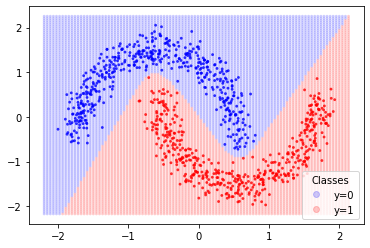

In [11]:

y_predict = ann.predict(X_test.T)

fig, ax = plt.subplots()
scatter_2class(X_test,y_predict, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx1, xx2 = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
XX = np.c_[xx1.ravel(), xx2.ravel()]
YY_predict = ann.predict(XX.T)
scatter_2class(XX, YY_predict, ax = ax, alpha = 0.2)


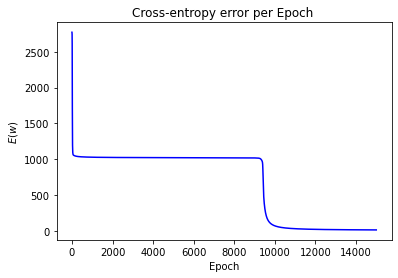

In [12]:
fig, ax = plt.subplots()
ax.plot(ann.error_epoch,'b')
ax.set_title('Cross-entropy error per Epoch ')
ax.set_xlabel('Epoch')
ax.set_ylabel(r'$E(w)$')
plt.show()